<a href="https://colab.research.google.com/github/RaymondUW2023/NN-Group-Project-Team-14/blob/main/PCA_of_Cifar_10_And_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Examples of PCA and Random Forest followed from Tensorflow website
# Optimization Loop for n_compontents written by me.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


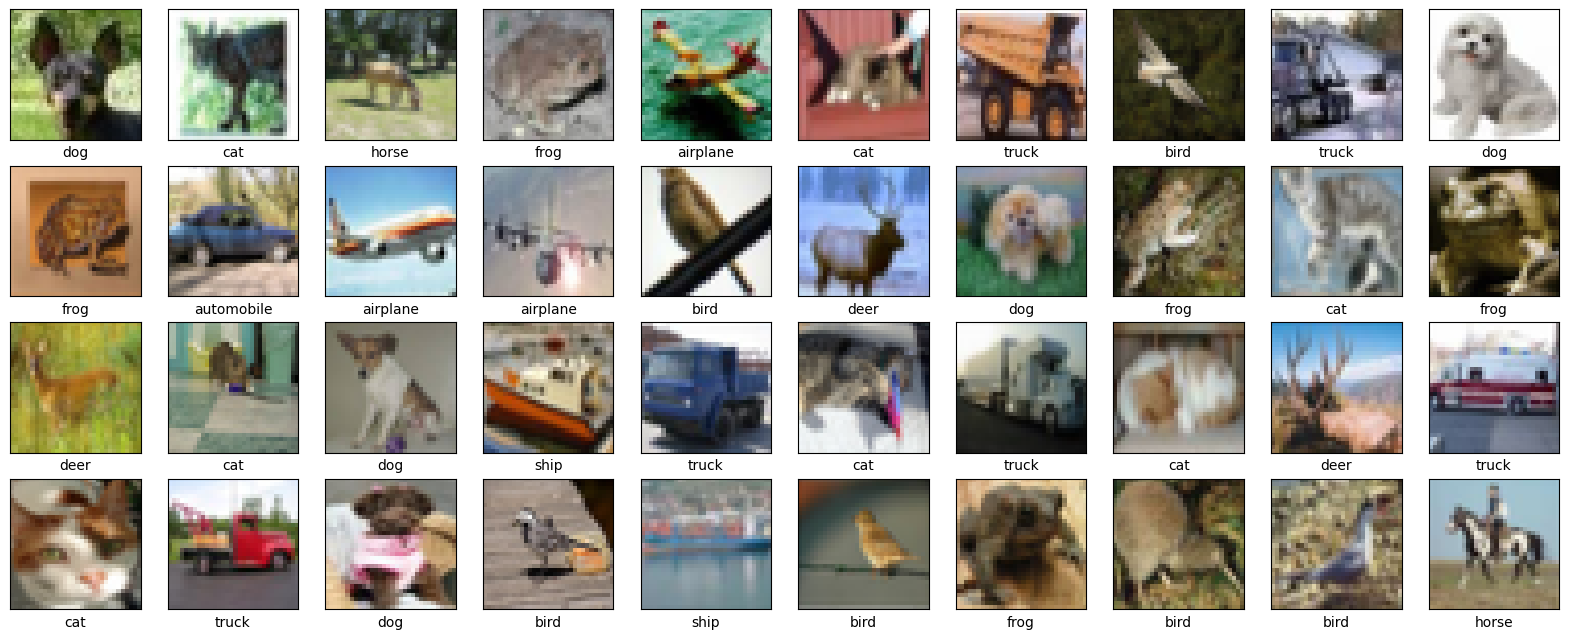

In [5]:
# Visualizing the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+2500])
    plt.xlabel(class_names[train_labels[i+2500][0]])
plt.show()

In [6]:
x_train = train_images.reshape((50000,3072))
x_test = test_images.reshape((10000,3072))
y_train = train_labels.reshape(50000,)
y_test = test_labels.reshape(10000,)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000,))

Applying PCA

In [7]:
import sklearn
from sklearn.decomposition import PCA

In [8]:
k = 200
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 200), (10000, 200))

XGBoosting Time

In [13]:
# Import the require libaries
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:
# Define XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Adjust as needed
    #learning_rate=0.1,  # Adjust as needed
    #max_depth=5,        # Adjust as needed
    #subsample=0.8,      # Adjust as needed
    #colsample_bytree=0.8,  # Adjust as needed
    objective='multi:softmax',
    num_class=10,
    random_state=7
)

# Train the model
xgb_model.fit(x_train_transformed, y_train.ravel())

# Make predictions on the test set
y_pred = xgb_model.predict(x_test_transformed)

# Evaluate accuracy
accuracy = accuracy_score(y_test.ravel(), y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5112


In [27]:
# make predictions for test data
y_pred = xgb_model.predict(x_test_transformed)
predictions = [round(value) for value in y_pred]

In [28]:
# Performance evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
print("P(classification) =", np.round(accuracy_score(y_test, predictions), 5))
print("Confusion matrix: \n", confusion_matrix(y_test,predictions))


P(classification) = 0.5112
Confusion matrix: 
 [[575  36  48  34  23  22  26  23 147  66]
 [ 39 607  17  28  13  21  17  26  56 176]
 [ 79  26 370  99 129  79  97  63  29  29]
 [ 35  26  73 336  55 211 111  69  33  51]
 [ 41   9 139  84 423  49 119  86  27  23]
 [ 24  19  78 219  59 406  63  85  24  23]
 [ 12  22  68  84  88  50 620  28  13  15]
 [ 36  26  35  71  75  83  42 555  17  60]
 [101  76  17  27  14  20  10  17 645  73]
 [ 43 153  15  34  10  18  33  45  74 575]]


Optimize the XGBoost number of estimators

In [33]:
range_of_n = 44
accuacy_index_for_Xgboost_Classifier = tf.zeros(range_of_n).numpy()
N_component_idx_for_Xgboost_Classifier = tf.zeros(range_of_n).numpy()
temp_state = 0
counter = 0
for i in range(5,805,25):
  counter = counter + 1
  xgb_model = xgb.XGBClassifier(n_estimators=i,   objective='multi:softmax',num_class=10,random_state=7)
  xgb_model.fit(x_train_transformed, y_train.ravel())
  acc = xgb_model.score(x_test_transformed,y_test)
  accuacy_index_for_Xgboost_Classifier[counter-1] = acc
  N_component_idx_for_Xgboost_Classifier[counter-1] = i
  print(i)
  if acc > temp_state:
    best_number_N_classifiers = i
    temp_state =acc

5
30
55
80
105
130
155
180
205
230
255
280
305
330
355
380
405
430
455
480
505
530
555
580
605
630
655
680
705
730
755
780
805


KeyboardInterrupt: ignored

805


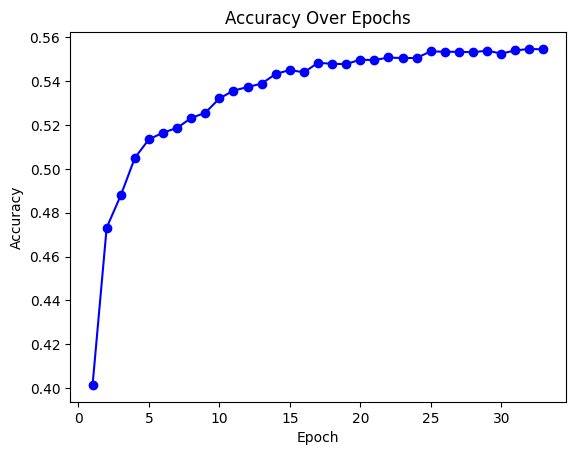

In [43]:
print(best_number_N_classifiers)

# Plot the vector
plt.plot(np.arange(1, len(accuacy_index_for_Xgboost_Classifier[0:33])+1), accuacy_index_for_Xgboost_Classifier[0:33], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

# Show the plot
plt.show()

In [36]:
# Define XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=300,  # Adjust as needed
    #learning_rate=0.1,  # Adjust as needed
    #max_depth=5,        # Adjust as needed
    #subsample=0.8,      # Adjust as needed
    #colsample_bytree=0.8,  # Adjust as needed
    objective='multi:softmax',
    num_class=10,
    random_state=7
)

# Train the model
xgb_model.fit(x_train_transformed, y_train.ravel())

# Make predictions on the test set
y_pred = xgb_model.predict(x_test_transformed)

# Evaluate accuracy
accuracy = accuracy_score(y_test.ravel(), y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5408


In [40]:
Cmat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test.ravel(), y_pred)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[586  36  51  29  23  28  22  23 134  68]
 [ 34 632  13  29  13  17  26  24  55 157]
 [ 75  26 399 104 125  82  89  54  25  21]
 [ 32  24  77 355  61 218  99  57  30  47]
 [ 39   4 125  85 462  50 113  80  25  17]
 [ 17  13  71 218  63 441  54  79  20  24]
 [  7  20  58  78  77  41 662  25  13  19]
 [ 29  18  32  71  67  80  37 590  15  61]
 [ 82  74  16  25  16  16  10  17 679  65]
 [ 43 150  17  34   7  18  28  38  63 602]]
Accuracy: 54.08%


In [41]:
import numpy as np
import pandas as pd
from google.colab import drive

In [44]:
# Mount Google Drive
drive.mount('/content/drive')

# Save the array to a CSV file
csv_filename = '/content/drive/MyDrive/my_array_XGB.csv'
np.savetxt(csv_filename, accuacy_index_for_Xgboost_Classifier, delimiter=',')
csv_filename = '/content/drive/MyDrive/my_array_XGB2.csv'
np.savetxt(csv_filename, N_component_idx_for_Xgboost_Classifier, delimiter=',')


Mounted at /content/drive
